In [ ]:
import pandas as pd

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display first few rows of each
print("Customers Data:")
print(customers.head())

print("\nProducts Data:")
print(products.head())

print("\nTransactions Data:")
print(transactions.head())


In [ ]:
# Check for missing values
print("Missing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Check for duplicates
print("\nDuplicates:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())


In [ ]:
# Check data types
print("Data Types:")
print(customers.dtypes)
print(products.dtypes)
print(transactions.dtypes)


In [ ]:
# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Preview merged data
print(merged_data.head())


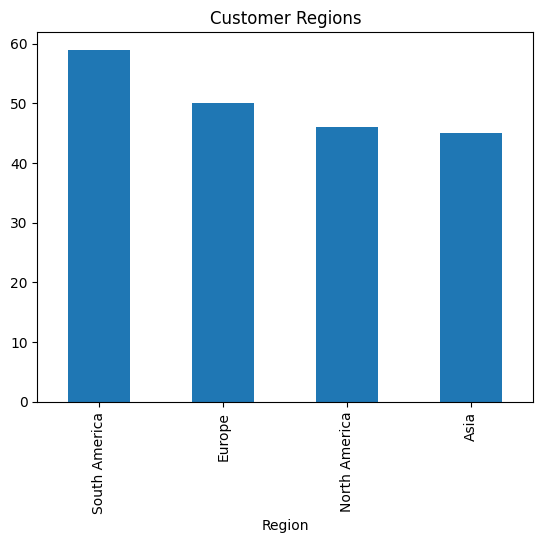

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Customer regions distribution
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', title='Customer Regions')
plt.show()


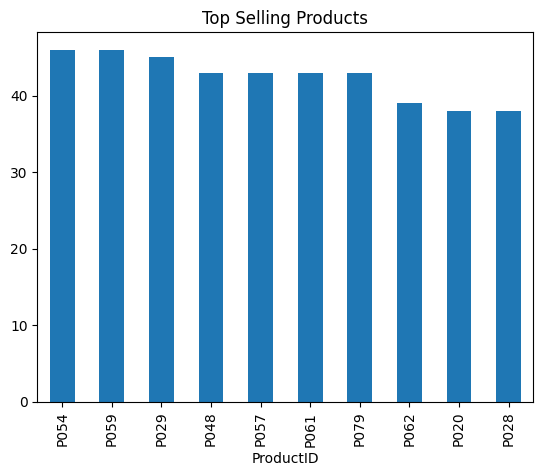

In [12]:
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top Selling Products')
plt.show()


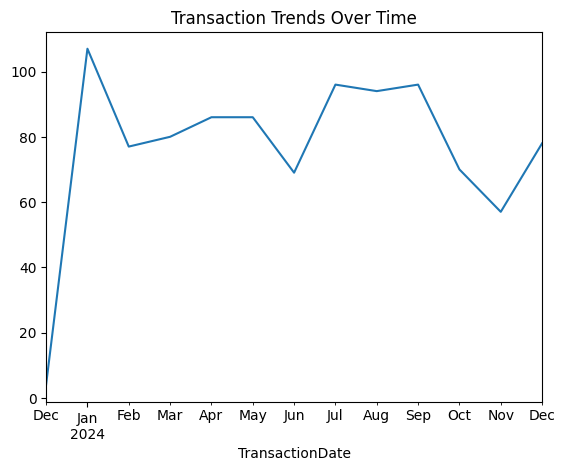

In [11]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transaction_trends = transactions.groupby(transactions['TransactionDate'].dt.to_period('M')).size()
transaction_trends.plot(title='Transaction Trends Over Time')
plt.show()


In [10]:
# Count transactions per customer
customer_transactions = transactions.groupby('CustomerID').size()

# Find repeat customers
repeat_customers = customer_transactions[customer_transactions > 1]

# Total customers and repeat customers
total_customers = customers['CustomerID'].nunique()
repeat_customers_count = len(repeat_customers)

# Percentage of repeat customers
repeat_customer_percentage = (repeat_customers_count / total_customers) * 100
print(f"Repeat Customers Percentage: {repeat_customer_percentage:.2f}%")

# Total transactions by repeat customers
repeat_customer_transaction_count = transactions[transactions['CustomerID'].isin(repeat_customers.index)].shape[0]

# Percentage contribution
repeat_transaction_percentage = (repeat_customer_transaction_count / len(transactions)) * 100
print(f"Percentage of Transactions by Repeat Customers: {repeat_transaction_percentage:.2f}%")


Repeat Customers Percentage: 93.50%
Percentage of Transactions by Repeat Customers: 98.80%
